In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Carga de datos

# Columns 
# 1: id (int) [0-...]
# 2: year (number)
# 3: month (number)
# 4: day_of_month (number)
# 5: prp (float) [mm]
# 6: tmax (float) [°C]
# 7: tmin (float) [°C]
# negative values (-99.9) are missing data

df = pd.read_csv(os.path.join('..', 'data','data_precipitaciones', 'LIMA_HUARANGAL.csv'))

In [2]:
# Adding column names
df.columns = ['id', 'year', 'month', 'day_of_month', 'prp', 'tmax', 'tmin']
# replacing negative values with NaN
df[df<0] = np.nan
# sampling 20 rows
df.sample(20)

,id,year,month,day_of_month,prp,tmin,tmax
9823,9824,2006,12,25,NaN,NaN,NaN
11297,11298,2011,1,7,0.00,25.5,17.8
5624,5625,1995,6,27,NaN,NaN,NaN
3022,3023,1988,5,12,0.00,25.5,16.2
1934,1935,1985,5,20,0.00,24.4,15.7
9113,9114,2005,1,14,1.00,19.8,18.1
8718,8719,2003,12,16,0.00,25.6,16.9
5238,5239,1994,6,6,0.00,22.1,15.5
1761,1762,1984,11,28,0.00,20.2,16.8
9296,9297,2005,7,16,0.00,17.8,12.3


In [3]:
# Number of rows 
print('Number of rows: ', df.shape[0])
# Proportion of Nan by column
print('Proportion of Nan by column: ', df.isna().sum()/df.shape[0])

Number of rows:  11625
Proportion of Nan by column:  id              0.000000
year            0.000000
month           0.000000
day_of_month    0.000000
prp             0.162839
tmin            0.163699
tmax            0.165935
dtype: float64


# Precipitation Data
We suspect that precipitation data for the rainforest region 
doesn't contain enought information to build an useful model.


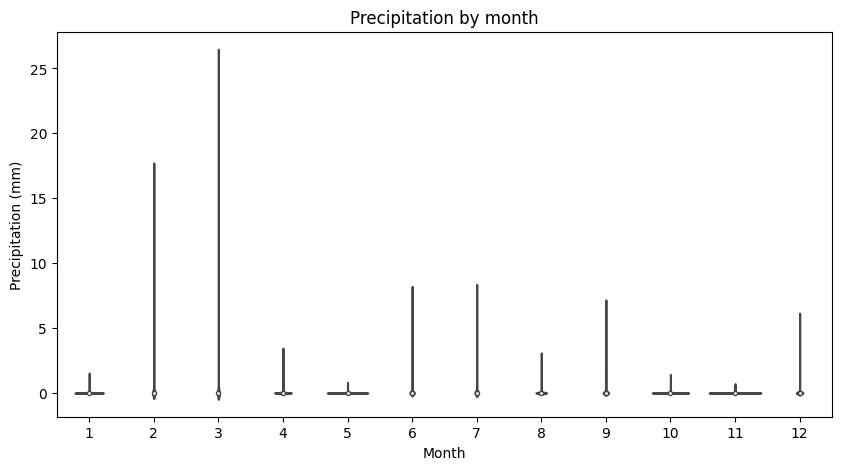

In [4]:
# Group prp data by month 
prp_month = df.groupby('month')['prp']

# Plotting violin plot
plt.figure(figsize=(10,5))
sns.violinplot(x='month', y='prp', data=df)
plt.title('Precipitation by month')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.show()

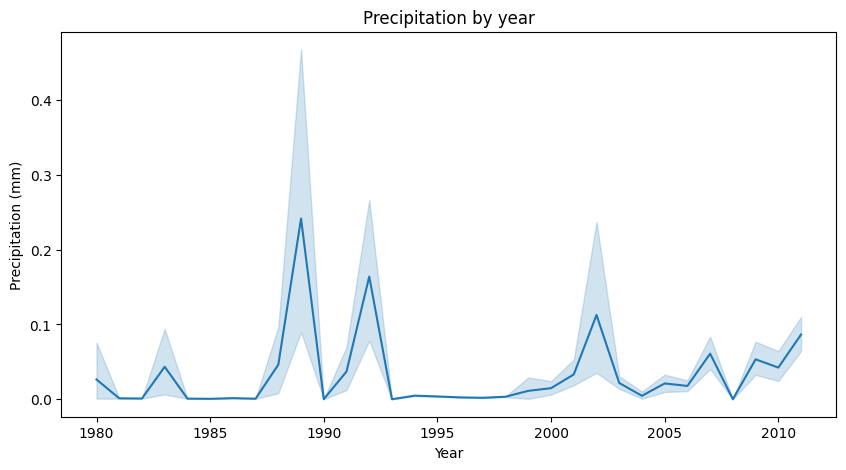

In [5]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='prp', data=df)
plt.title('Precipitation by year')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.show()

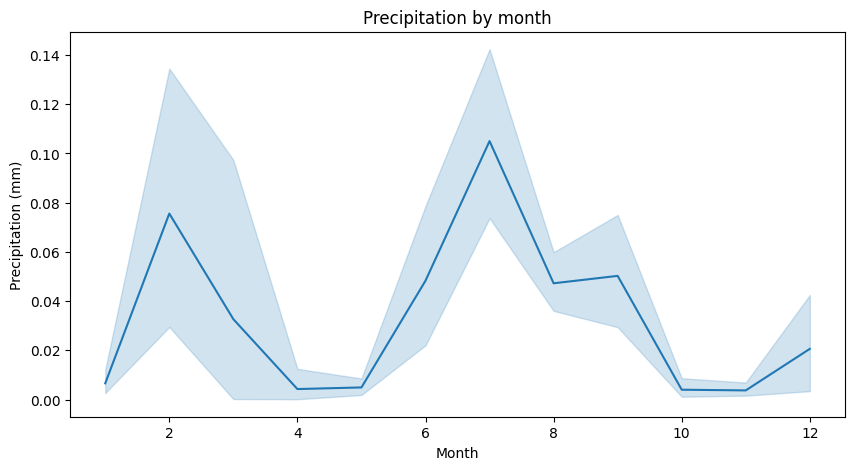

In [6]:
# Lineplot of prp by month of all the data
plt.figure(figsize=(10,5))
sns.lineplot(x='month', y='prp', data=df)
plt.title('Precipitation by month')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.show()

c:\Users\4verBurga\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


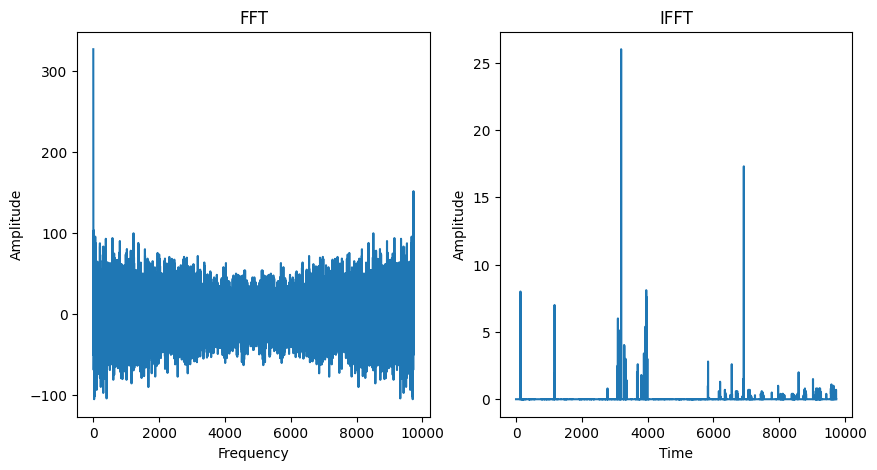

In [7]:
# fft 
from scipy.fftpack import fft, ifft
# removing NaN
prp = df['prp'].dropna()
# fft
prp_fft = fft(prp.values)
# inverse fft
prp_ifft = ifft(prp_fft)
# plotting both subplots, fft and ifft
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(prp_fft)
plt.title('FFT')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.subplot(1,2,2)
plt.plot(prp_ifft)
plt.title('IFFT')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

c:\Users\4verBurga\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


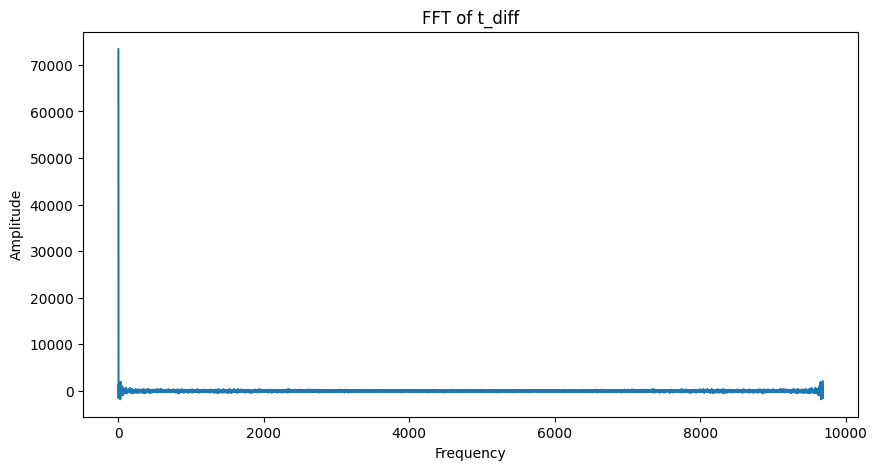

In [9]:
# difference of temperature
df['t_diff'] = abs(df['tmax'] - df['tmin'])
# fft of t_diff
t_diff_fft = fft(df['t_diff'].dropna().values)
# plotting fft of t_diff
plt.figure(figsize=(10,5))
plt.plot(t_diff_fft)
plt.title('FFT of t_diff')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


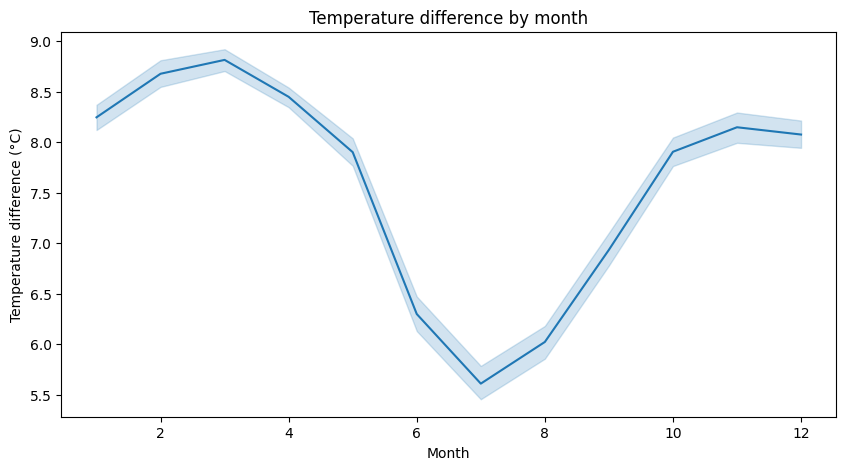

In [10]:
# temperature differences by month
plt.figure(figsize=(10,5))
sns.lineplot(x='month', y='t_diff', data=df)
plt.title('Temperature difference by month')
plt.xlabel('Month')
plt.ylabel('Temperature difference (°C)')
plt.show()


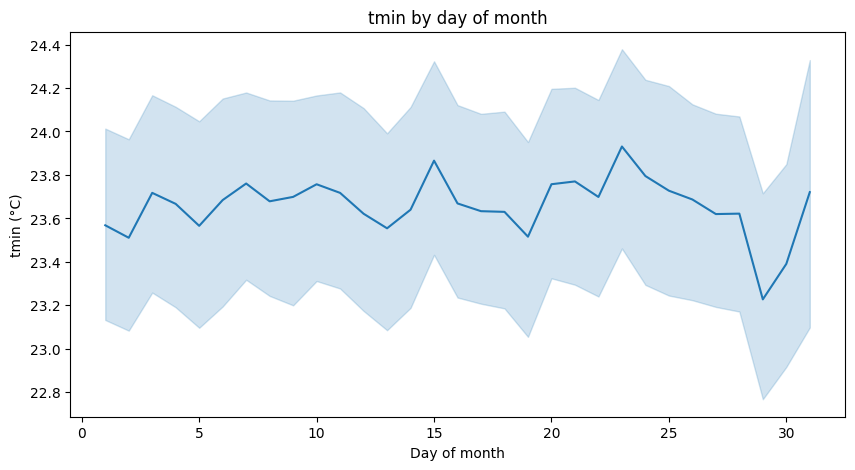

In [15]:
# tmin by day of month
plt.figure(figsize=(10,5))
sns.lineplot(x='day_of_month', y='tmin', data=df)
plt.title('tmin by day of month')
plt.xlabel('Day of month')
plt.ylabel('tmin (°C)')
plt.show()